In [ ]:
!pip install arch
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
# gráficos interactivos
import plotly.graph_objects as go
import plotly.express as px
# modelo GARCH
from arch import arch_model
# web scrapping
import bs4 as bs
import requests
import lxml
from functools import reduce
# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def getSymbols(url):
  resp = requests.get(url)
  soup = bs.BeautifulSoup(resp.text, 'lxml')
  table = soup.find('table', {'class': 'wikitable sortable'})
  ipc_table = pd.read_html(str(table))[0]
  # extraemos símbolos
  stocks = []
  for row in ipc_table.Symbol:
    symbol = row.strip().replace(" ", "").replace("-", "").replace("&", "")  + '.MX'
    stocks.append(symbol)
  return stocks

In [4]:
def getData(stocks, start_date, end_date):
  stock_data = {}
  for stock in stocks:
    symbol = yf.Ticker(stock)
    stock_data[stock] = symbol.history(start=start_date, end=end_date)['Close']

  df = pd.DataFrame(stock_data)
  return df

In [5]:
url = 'https://en.wikipedia.org/wiki/Indice_de_Precios_y_Cotizaciones'

symbols = getSymbols(url)
data = getData(symbols, start_date='2010-01-01', end_date='2022-08-01')
data.head()

- KOFL.MX: No data found, symbol may be delisted
- LIVEPOLC1.MX: No data found for this date range, symbol may be delisted
- PEOLES.MX: No data found, symbol may be delisted
- SITESB1.MX: No data found, symbol may be delisted


AC.MX  ALFAA.MX  ALSEA.MX    AMXL.MX   ASURB.MX  BBAJIOO.MX  \
Date                                                                          
2010-01-04  26.626411  8.556669  8.968351  11.812742  51.313148         NaN   
2010-01-05  26.626411  8.383161  8.977143  11.726355  51.522839         NaN   
2010-01-06  26.503990  8.431897  8.968351  11.696309  52.694138         NaN   
2010-01-07  26.681501  8.411427  8.915596  11.854060  52.939968         NaN   
2010-01-08  26.197941  8.340267  8.915596  11.775183  52.563976         NaN   

            BIMBOA.MX  BOLSAA.MX  CEMEXCPO.MX  CUERVO.MX  ...   ORBIA.MX  \
Date                                                      ...              
2010-01-04  19.716585   8.665266    11.338881        NaN  ...  19.795593   
2010-01-05  19.739017   8.883577    11.346002        NaN  ...  20.333263   
2010-01-06  19.716585   8.978739    11.239166        NaN  ...  20.711908   
2010-01-07  19.848927   9.029118    11.331758        NaN  ...  21.537359   
2010-01-08  19.739017   9.499326    11.217799        NaN  ...  21.590363   

            PEOLES.MX  PINFRA.MX  Q.MX  RA.MX  SITESB1.MX  TLEVISACPO.MX  \
Date                                                                       
2010-01-04        NaN  25.203758   NaN    NaN         NaN      51.064972   
2010-01-05        NaN  25.195124   NaN    NaN         NaN      50.371109   
2010-01-06        NaN  25.894268   NaN    NaN         NaN      49.892899   
2010-01-07        NaN  25.885637   NaN    NaN         NaN      50.680531   
2010-01-08        NaN  26.015110   NaN    NaN         NaN      49.517834   

            VESTA.MX  VOLARA.MX  WALMEX.MX  
Date                                        
2010-01-04       NaN        NaN  22.888069  
2010-01-05       NaN        NaN  23.286463  
2010-01-06       NaN        NaN  23.363071  
2010-01-07       NaN        NaN  22.895735  
2010-01-08       NaN        NaN  22.715691  

[5 rows x 35 columns]

In [10]:
len(data.columns)

35

In [11]:
data = data[[data.columns[i] for i in range(len(data.columns)) if ~np.isnan(data.iloc[0][i]) ]]
data.head()

AC.MX  ALFAA.MX  ALSEA.MX    AMXL.MX   ASURB.MX  BIMBOA.MX  \
Date                                                                         
2010-01-04  26.626411  8.556669  8.968351  11.812742  51.313148  19.716585   
2010-01-05  26.626411  8.383161  8.977143  11.726355  51.522839  19.739017   
2010-01-06  26.503990  8.431897  8.968351  11.696309  52.694138  19.716585   
2010-01-07  26.681501  8.411427  8.915596  11.854060  52.939968  19.848927   
2010-01-08  26.197941  8.340267  8.915596  11.775183  52.563976  19.739017   

            BOLSAA.MX  CEMEXCPO.MX  ELEKTRA.MX  FEMSAUBD.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2010-01-04   8.665266    11.338881  604.178162    51.199028  ...    19.616531   
2010-01-05   8.883577    11.346002  596.843079    49.648502  ...    19.541492   
2010-01-06   8.978739    11.239166  594.830688    50.054031  ...    19.791616   
2010-01-07   9.029118    11.331758  615.613220    50.865070  ...    19.897921   
2010-01-08   9.499326    11.217799  633.499268    50.173294  ...    19.747849   

            GRUMAB.MX  KIMBERA.MX    LABB.MX  MEGACPO.MX    OMAB.MX  \
Date                                                                  
2010-01-04  20.370735   11.053907  13.846369   21.217125  10.988795   
2010-01-05  20.533358   11.023736  14.266231   21.967035  10.959107   
2010-01-06  21.183853   11.029391  14.672546   22.035213  11.013532   
2010-01-07  22.852884   10.835169  14.785413   21.936737  11.147119   
2010-01-08  23.349318   10.672999  14.762839   21.982185  11.246075   

             ORBIA.MX  PINFRA.MX  TLEVISACPO.MX  WALMEX.MX  
Date                                                        
2010-01-04  19.795593  25.203758      51.064972  22.888069  
2010-01-05  20.333263  25.195124      50.371109  23.286463  
2010-01-06  20.711908  25.894268      49.892899  23.363071  
2010-01-07  21.537359  25.885637      50.680531  22.895735  
2010-01-08  21.590363  26.015110      49.517834  22.715691  

[5 rows x 25 columns]

El símbolo **GCC.MX** contiene muchos valores perdidos, por lo que elimina del conjunto de datos. Para el resto se empleará una interpolación para rellenar los vares faltantes.

In [12]:
data.isna().sum()

AC.MX             3
ALFAA.MX          8
ALSEA.MX          3
AMXL.MX           3
ASURB.MX          3
BIMBOA.MX         3
BOLSAA.MX         3
CEMEXCPO.MX       3
ELEKTRA.MX        3
FEMSAUBD.MX       3
GAPB.MX          11
GCARSOA1.MX       3
GCC.MX           87
GFINBURO.MX       3
GFNORTEO.MX       3
GMEXICOB.MX       3
GRUMAB.MX         3
KIMBERA.MX        8
LABB.MX           3
MEGACPO.MX        4
OMAB.MX           3
ORBIA.MX          3
PINFRA.MX         3
TLEVISACPO.MX     3
WALMEX.MX         3
dtype: int64

In [13]:
data = data.drop('GCC.MX', axis=1)
data.head()

AC.MX  ALFAA.MX  ALSEA.MX    AMXL.MX   ASURB.MX  BIMBOA.MX  \
Date                                                                         
2010-01-04  26.626411  8.556669  8.968351  11.812742  51.313148  19.716585   
2010-01-05  26.626411  8.383161  8.977143  11.726355  51.522839  19.739017   
2010-01-06  26.503990  8.431897  8.968351  11.696309  52.694138  19.716585   
2010-01-07  26.681501  8.411427  8.915596  11.854060  52.939968  19.848927   
2010-01-08  26.197941  8.340267  8.915596  11.775183  52.563976  19.739017   

            BOLSAA.MX  CEMEXCPO.MX  ELEKTRA.MX  FEMSAUBD.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2010-01-04   8.665266    11.338881  604.178162    51.199028  ...    19.616531   
2010-01-05   8.883577    11.346002  596.843079    49.648502  ...    19.541492   
2010-01-06   8.978739    11.239166  594.830688    50.054031  ...    19.791616   
2010-01-07   9.029118    11.331758  615.613220    50.865070  ...    19.897921   
2010-01-08   9.499326    11.217799  633.499268    50.173294  ...    19.747849   

            GRUMAB.MX  KIMBERA.MX    LABB.MX  MEGACPO.MX    OMAB.MX  \
Date                                                                  
2010-01-04  20.370735   11.053907  13.846369   21.217125  10.988795   
2010-01-05  20.533358   11.023736  14.266231   21.967035  10.959107   
2010-01-06  21.183853   11.029391  14.672546   22.035213  11.013532   
2010-01-07  22.852884   10.835169  14.785413   21.936737  11.147119   
2010-01-08  23.349318   10.672999  14.762839   21.982185  11.246075   

             ORBIA.MX  PINFRA.MX  TLEVISACPO.MX  WALMEX.MX  
Date                                                        
2010-01-04  19.795593  25.203758      51.064972  22.888069  
2010-01-05  20.333263  25.195124      50.371109  23.286463  
2010-01-06  20.711908  25.894268      49.892899  23.363071  
2010-01-07  21.537359  25.885637      50.680531  22.895735  
2010-01-08  21.590363  26.015110      49.517834  22.715691  

[5 rows x 24 columns]

In [16]:
data_fill = data.interpolate()
data_fill.isna().sum()

AC.MX            0
ALFAA.MX         0
ALSEA.MX         0
AMXL.MX          0
ASURB.MX         0
BIMBOA.MX        0
BOLSAA.MX        0
CEMEXCPO.MX      0
ELEKTRA.MX       0
FEMSAUBD.MX      0
GAPB.MX          0
GCARSOA1.MX      0
GFINBURO.MX      0
GFNORTEO.MX      0
GMEXICOB.MX      0
GRUMAB.MX        0
KIMBERA.MX       0
LABB.MX          0
MEGACPO.MX       0
OMAB.MX          0
ORBIA.MX         0
PINFRA.MX        0
TLEVISACPO.MX    0
WALMEX.MX        0
dtype: int64

In [17]:
data_fill.to_csv('IPC.csv')

AC.MX  ALFAA.MX  ALSEA.MX    AMXL.MX   ASURB.MX  BIMBOA.MX  \
Date                                                                         
2010-01-04  26.626411  8.556669  8.968351  11.812742  51.313148  19.716585   
2010-01-05  26.626411  8.383161  8.977143  11.726355  51.522839  19.739017   
2010-01-06  26.503990  8.431897  8.968351  11.696309  52.694138  19.716585   
2010-01-07  26.681501  8.411427  8.915596  11.854060  52.939968  19.848927   
2010-01-08  26.197941  8.340267  8.915596  11.775183  52.563976  19.739017   

            BOLSAA.MX  CEMEXCPO.MX  ELEKTRA.MX  FEMSAUBD.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2010-01-04   8.665266    11.338881  604.178162    51.199028  ...    19.616531   
2010-01-05   8.883577    11.346002  596.843079    49.648502  ...    19.541492   
2010-01-06   8.978739    11.239166  594.830688    50.054031  ...    19.791616   
2010-01-07   9.029118    11.331758  615.613220    50.865070  ...    19.897921   
2010-01-08   9.499326    11.217799  633.499268    50.173294  ...    19.747849   

            GRUMAB.MX  KIMBERA.MX    LABB.MX  MEGACPO.MX    OMAB.MX  \
Date                                                                  
2010-01-04  20.370735   11.053907  13.846369   21.217125  10.988795   
2010-01-05  20.533358   11.023736  14.266231   21.967035  10.959107   
2010-01-06  21.183853   11.029391  14.672546   22.035213  11.013532   
2010-01-07  22.852884   10.835169  14.785413   21.936737  11.147119   
2010-01-08  23.349318   10.672999  14.762839   21.982185  11.246075   

             ORBIA.MX  PINFRA.MX  TLEVISACPO.MX  WALMEX.MX  
Date                                                        
2010-01-04  19.795593  25.203758      51.064972  22.888069  
2010-01-05  20.333263  25.195124      50.371109  23.286463  
2010-01-06  20.711908  25.894268      49.892899  23.363071  
2010-01-07  21.537359  25.885637      50.680531  22.895735  
2010-01-08  21.590363  26.015110      49.517834  22.715691  

[5 rows x 24 columns]

In [25]:
[{"label": stock.split('.')[0], "value": stock} for stock in data_fill.columns] 

[{'label': 'AC', 'value': 'AC.MX'},
 {'label': 'ALFAA', 'value': 'ALFAA.MX'},
 {'label': 'ALSEA', 'value': 'ALSEA.MX'},
 {'label': 'AMXL', 'value': 'AMXL.MX'},
 {'label': 'ASURB', 'value': 'ASURB.MX'},
 {'label': 'BIMBOA', 'value': 'BIMBOA.MX'},
 {'label': 'BOLSAA', 'value': 'BOLSAA.MX'},
 {'label': 'CEMEXCPO', 'value': 'CEMEXCPO.MX'},
 {'label': 'ELEKTRA', 'value': 'ELEKTRA.MX'},
 {'label': 'FEMSAUBD', 'value': 'FEMSAUBD.MX'},
 {'label': 'GAPB', 'value': 'GAPB.MX'},
 {'label': 'GCARSOA1', 'value': 'GCARSOA1.MX'},
 {'label': 'GFINBURO', 'value': 'GFINBURO.MX'},
 {'label': 'GFNORTEO', 'value': 'GFNORTEO.MX'},
 {'label': 'GMEXICOB', 'value': 'GMEXICOB.MX'},
 {'label': 'GRUMAB', 'value': 'GRUMAB.MX'},
 {'label': 'KIMBERA', 'value': 'KIMBERA.MX'},
 {'label': 'LABB', 'value': 'LABB.MX'},
 {'label': 'MEGACPO', 'value': 'MEGACPO.MX'},
 {'label': 'OMAB', 'value': 'OMAB.MX'},
 {'label': 'ORBIA', 'value': 'ORBIA.MX'},
 {'label': 'PINFRA', 'value': 'PINFRA.MX'},
 {'label': 'TLEVISACPO', 'value': 

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in data_fill.columns:
  fig.add_trace(go.Scatter(
      x = data_fill.reset_index()['Date'],
      y = data_fill.reset_index()[stock],
      mode = 'lines',
      #fill='tozeroy',
      #line_color='blue',
      name = stock))

fig.update_layout(
    {'title': {'text': 'Precios de cierre',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()

In [ ]:
x_data = data_fill.columns

y_data = [data_fill[stock].tolist() for stock in data_fill.columns] 

colors = ['rgba({}, 164, 214, 0.5)'.format(i) for i in range(len(data_fill.columns))]


fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):

  fig.add_trace(go.Box(
      y=yd,
      name=xd,
      boxpoints='outliers',
      #jitter=0,
      whiskerwidth=0.2,
      #fillcolor=cls,
      marker_size=2,
      line_width=1
      #marker_color=cls
      )
  )

fig.update_layout(
    title='Points Scored by the Top 9 Scoring NBA Players in 2012',
    yaxis=dict(
        #autorange=True,
        #showgrid=True,
        zeroline=True,
        #dtick=1,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    
    #paper_bgcolor='rgb(243, 243, 243)',
    #plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.update_traces(orientation='v')

fig.show()

# **Rendimientos**

In [ ]:
# Función para obtener los rendimientos 
def getReturns(data, simple=False):
  if simple:
    ret = data/data.shift(1) -1
  else:
    ret = np.log(data/data.shift(1))
  return ret.dropna()

In [ ]:
returns = getReturns(data_fill, simple=True)
returns.head()

AC.MX  ALFAA.MX  ALSEA.MX   AMXL.MX  ASURB.MX  BIMBOA.MX  \
Date                                                                      
2010-01-05  0.000000 -0.020278  0.000980 -0.007313  0.004086   0.001138   
2010-01-06 -0.004598  0.005814 -0.000979 -0.002562  0.022734  -0.001136   
2010-01-07  0.006697 -0.002428 -0.005882  0.013488  0.004665   0.006712   
2010-01-08 -0.018123 -0.008460  0.000000 -0.006654 -0.007102  -0.005537   
2010-01-11 -0.026869  0.017999 -0.015779  0.012759 -0.028473   0.027614   

            BOLSAA.MX  CEMEXCPO.MX  ELEKTRA.MX  FEMSAUBD.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2010-01-05   0.025194     0.000628   -0.012140    -0.030284  ...    -0.003825   
2010-01-06   0.010712    -0.009416   -0.003372     0.008168  ...     0.012800   
2010-01-07   0.005611     0.008238    0.034939     0.016203  ...     0.005371   
2010-01-08   0.052077    -0.010057    0.029054    -0.013600  ...    -0.007542   
2010-01-11  -0.027107     0.001905    0.034929    -0.130903  ...     0.004433   

            GRUMAB.MX  KIMBERA.MX   LABB.MX  MEGACPO.MX   OMAB.MX  ORBIA.MX  \
Date                                                                          
2010-01-05   0.007983   -0.002730  0.030323    0.035345 -0.002702  0.027162   
2010-01-06   0.031680    0.000513  0.028481    0.003103  0.004966  0.018622   
2010-01-07   0.078788   -0.017610  0.007692   -0.004469  0.012130  0.039854   
2010-01-08   0.021723   -0.014967 -0.001527    0.002072  0.008877  0.002461   
2010-01-11  -0.015396   -0.022968 -0.023853    0.004480 -0.012319  0.009470   

            PINFRA.MX  TLEVISACPO.MX  WALMEX.MX  
Date                                             
2010-01-05  -0.000342      -0.013588   0.017406  
2010-01-06   0.027749      -0.009494   0.003290  
2010-01-07  -0.000333       0.015787  -0.020003  
2010-01-08   0.005002      -0.022942  -0.007864  
2010-01-11  -0.023557      -0.003787   0.025127  

[5 rows x 24 columns]

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in ['ELEKTRA.MX']:
  fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = returns[stock],
      mode = 'lines',
      #fill='tozeroy',
      #line_color='blue',
      name = stock))

fig.update_layout(
    {'title': {'text': 'Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()

# **GARCH Model**

In [ ]:
# especificación del modelo GARCH(1, 1)
model1 = arch_model(returns['ELEKTRA.MX'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
# actualiza el modelo cada 4 iteraciones
res = model1.fit(update_freq=5)

Iteration:      5,   Func. Count:     62,   Neg. LLF: 1.266277908421182e+16
Iteration:     10,   Func. Count:    131,   Neg. LLF: -8668.879666370009
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8668.87965025855
            Iterations: 14
            Function evaluations: 131
            Gradient evaluations: 10


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




Prámetros estimados por máxima verosimilitud.

In [ ]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             ELEKTRA.MX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8668.88
Distribution:                  Normal   AIC:                          -17329.8
Method:            Maximum Likelihood   BIC:                          -17305.5
                                        No. Observations:                 3158
Date:                Tue, Sep 06 2022   Df Residuals:                     3157
Time:                        20:52:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6224e-04  4.259e-06     38.095      0.000 [1.

In [ ]:
volatility_sup_garch, volatility_inf_garch = res.conditional_volatility, -res.conditional_volatility

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in ['ELEKTRA.MX']:
  fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = returns[stock],
      mode = 'lines',
      #fill='tozeroy',
      line_color='blue',
      name = stock))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_garch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_garch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.update_layout(
    {'title': {'text': 'Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()

# **Residuales**

In [ ]:
residuales = res.resid

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=residuales, name = 'volatility'))
fig.update_layout(
    {'title': {'text': 'Hostograma de los Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
fig.show()

# **Forecasting**

In [ ]:
# Make 5-period ahead forecast
model_forecast = res.forecast(horizon = 10)
# Print out the last row of variance forecast
print(model_forecast.variance[-1:])

                h.01      h.02      h.03    h.04      h.05      h.06  \
Date                                                                   
2022-07-29  0.000186  0.000191  0.000195  0.0002  0.000204  0.000209   

                h.07      h.08      h.09      h.10  
Date                                                
2022-07-29  0.000213  0.000217  0.000221  0.000225  


/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




In [ ]:
forecast = model_forecast.variance.dropna().values.flatten()
print(np.sqrt(forecast))


[0.01364545 0.01381557 0.01398028 0.01413983 0.01429446 0.01444439
 0.01458983 0.01473097 0.01486798 0.01500104]


# **GJR-GARCH**



In [ ]:
# especificación del modelo GARCH(1, 1)
model2 = arch_model(returns['ELEKTRA.MX'], p = 1, q = 1, o=1, mean = 'constant', vol = 'GARCH', dist = 'normal')
# actualiza el modelo cada 4 iteraciones
res = model2.fit(update_freq=4)

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




Iteration:      4,   Func. Count:     53,   Neg. LLF: 4.2409721326071296e+21
Iteration:      8,   Func. Count:    110,   Neg. LLF: 4.902193701235186e+21
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8666.53701425388
            Iterations: 15
            Function evaluations: 156
            Gradient evaluations: 11


In [ ]:
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:             ELEKTRA.MX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                8666.54
Distribution:                  Normal   AIC:                          -17323.1
Method:            Maximum Likelihood   BIC:                          -17292.8
                                        No. Observations:                 3158
Date:                Tue, Sep 06 2022   Df Residuals:                     3157
Time:                        20:47:12   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.9593e-04  8.020e-07    493.688      0.000 [3.

In [ ]:
volatility_sup_gjrgarch, volatility_inf_gjrgarch = res.conditional_volatility, -res.conditional_volatility

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in ['ELEKTRA.MX']:
  fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = returns[stock],
      mode = 'lines',
      #fill='tozeroy',
      line_color='blue',
      name = stock))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_gjrgarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_gjrgarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.update_layout(
    {'title': {'text': 'Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()

# **EGARCH**

In [ ]:
# especificación del modelo GARCH(1, 1)
model3 = arch_model(returns['ELEKTRA.MX'], p = 1, q = 1, o=1, mean = 'constant', vol = 'EGARCH')
# actualiza el modelo cada 4 iteraciones
res = model3.fit(update_freq=4)

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




Iteration:      4,   Func. Count:     42,   Neg. LLF: 5982.341589467633
Iteration:      8,   Func. Count:     72,   Neg. LLF: -8725.43789104902
Iteration:     12,   Func. Count:     96,   Neg. LLF: -8725.811129869031
Iteration:     16,   Func. Count:    119,   Neg. LLF: -8725.811198003656
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8725.811198011252
            Iterations: 16
            Function evaluations: 119
            Gradient evaluations: 16


In [ ]:
print(res.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:             ELEKTRA.MX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                8725.81
Distribution:                  Normal   AIC:                          -17441.6
Method:            Maximum Likelihood   BIC:                          -17411.3
                                        No. Observations:                 3158
Date:                Tue, Sep 06 2022   Df Residuals:                     3157
Time:                        20:20:38   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.7882e-04  2.104e-04      0.850      0.395 

In [ ]:
volatility_sup_egarch, volatility_inf_egarch = res.conditional_volatility, -res.conditional_volatility

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in ['ELEKTRA.MX']:
  fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = returns[stock],
      mode = 'lines',
      #fill='tozeroy',
      line_color='blue',
      name = stock))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_egarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_egarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'volatility'))

fig.update_layout(
    {'title': {'text': 'Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()

# GARCH, JRGARCH and EGARCH

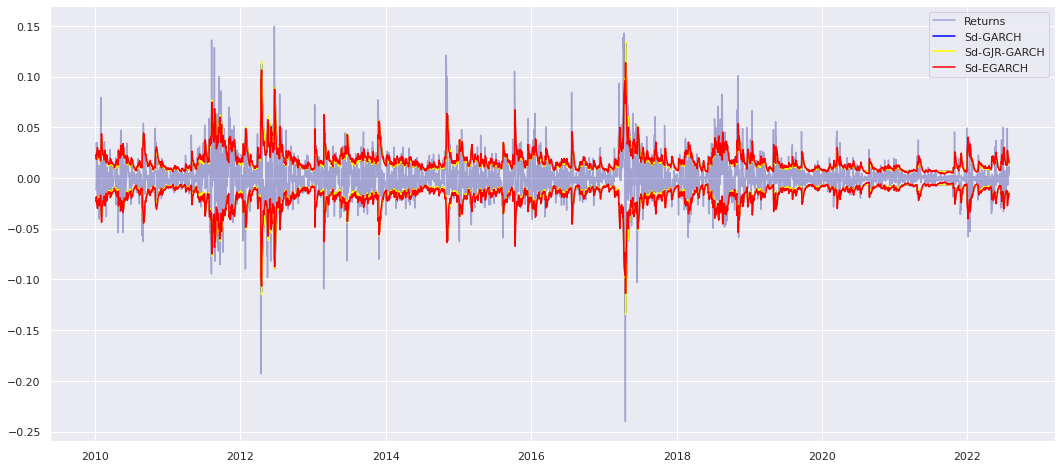

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(returns.reset_index()['Date'], returns['ELEKTRA.MX'], color='darkblue', alpha=0.3, label='Returns')
# garch
plt.plot(returns.reset_index()['Date'], volatility_sup_garch.tolist(), color='blue', label='Sd-GARCH')
plt.plot(returns.reset_index()['Date'], volatility_inf_garch.tolist(), color='blue')
# gjr-garch
plt.plot(returns.reset_index()['Date'], volatility_sup_gjrgarch.tolist(), color='yellow', label='Sd-GJR-GARCH')
plt.plot(returns.reset_index()['Date'], volatility_inf_gjrgarch.tolist(), color='yellow')
# egarch
plt.plot(returns.reset_index()['Date'], volatility_sup_egarch.tolist(), color='red', label='Sd-EGARCH')
plt.plot(returns.reset_index()['Date'], volatility_inf_egarch.tolist(), color='red')
plt.legend()
plt.show()

In [ ]:
date_bottons = [
    {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
    {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
    {'count':1, 'label':"1YR", 'step':"year", 'stepmode':"backward"},
    {'count':5, 'label':"5YR", 'step':"year", 'stepmode':"backward"},
    {'step':"all"}
    ]

fig = go.Figure()
for stock in ['ELEKTRA.MX']:
  fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = returns[stock],
      mode = 'lines',
      #fill='tozeroy',
      line_color='lightgrey',
      name = stock))
# garch
fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_garch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='blue',
      name = 'Sd-GARCH'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_garch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='blue',
      name = '-Sd-GARCH'))
# gjr-garch
fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_gjrgarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='yellow',
      name = 'Sd-GJR-GARCH'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_gjrgarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='yellow',
      name = '-Sd-GJR-GARCH'))
# egarch
fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_sup_egarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = 'Sd-EGARCH'))

fig.add_trace(go.Scatter(
      x = returns.reset_index()['Date'],
      y = volatility_inf_egarch.tolist(),
      mode = 'lines',
      #fill='tozeroy',
      line_color='red',
      name = '-Sd-EGARCH'))

fig.update_layout(
    {'title': {'text': 'Rendimientos',
               'x' : 0.5, 'y': 0.9}},
    width=1200,
    height=600
)
# time bottons
fig.update_layout(
    {'xaxis': {'rangeselector': 
               {'buttons': date_bottons}
    }}
)
fig.show()